In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm

In [3]:
# TTE    BNP      MC.PA

In [4]:
df = pd.read_csv("BNP.PA.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-01,46.035000,46.389999,45.435001,45.980000,42.983810,2158502.0
1,2022-09-02,46.474998,47.685001,46.169998,47.480000,44.386066,2718913.0
2,2022-09-05,46.200001,46.500000,45.810001,46.459999,43.432529,2335144.0
3,2022-09-06,46.474998,47.064999,46.169998,46.560001,43.526016,1843576.0
4,2022-09-07,46.029999,46.650002,45.709999,46.514999,43.483948,2197475.0


### Outliers

In [6]:
def find_outliers_iqr(data, column_name):
    # Calculate quartiles and IQR for the specified column
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    
    return outliers

In [7]:
find_outliers_iqr(df , "Open")

,Date,Open,High,Low,Close,Adj Close,Volume
19,2022-09-28,44.549999,45.040001,43.084999,43.349998,40.525188,5605309.0
20,2022-09-29,43.419998,43.549999,42.064999,42.535000,39.763294,3692206.0
21,2022-09-30,42.779999,43.605000,42.650002,43.605000,40.763573,3760558.0
22,2022-10-03,42.845001,44.189999,42.195000,43.880001,41.020653,3177201.0
23,2022-10-04,44.650002,45.474998,44.465000,45.474998,42.511715,4372071.0
25,2022-10-06,44.250000,44.645000,43.480000,43.634998,40.791615,2506012.0
26,2022-10-07,43.404999,44.169998,43.160000,43.615002,40.772923,2734191.0
27,2022-10-10,43.130001,44.240002,43.060001,43.785000,40.931843,2617328.0
28,2022-10-11,43.215000,43.235001,42.305000,42.764999,39.978310,2782908.0
29,2022-10-12,42.555000,42.555000,41.525002,42.345001,39.585678,2914797.0


In [8]:
find_outliers_iqr(df , "High")

,Date,Open,High,Low,Close,Adj Close,Volume
19,2022-09-28,44.549999,45.040001,43.084999,43.349998,40.525188,5605309.0
20,2022-09-29,43.419998,43.549999,42.064999,42.535000,39.763294,3692206.0
21,2022-09-30,42.779999,43.605000,42.650002,43.605000,40.763573,3760558.0
22,2022-10-03,42.845001,44.189999,42.195000,43.880001,41.020653,3177201.0
25,2022-10-06,44.250000,44.645000,43.480000,43.634998,40.791615,2506012.0
26,2022-10-07,43.404999,44.169998,43.160000,43.615002,40.772923,2734191.0
27,2022-10-10,43.130001,44.240002,43.060001,43.785000,40.931843,2617328.0
28,2022-10-11,43.215000,43.235001,42.305000,42.764999,39.978310,2782908.0
29,2022-10-12,42.555000,42.555000,41.525002,42.345001,39.585678,2914797.0
30,2022-10-13,41.779999,43.700001,41.700001,43.439999,40.609322,4126814.0


In [9]:
find_outliers_iqr(df , "Low")

,Date,Open,High,Low,Close,Adj Close,Volume
19,2022-09-28,44.549999,45.040001,43.084999,43.349998,40.525188,5605309.0
20,2022-09-29,43.419998,43.549999,42.064999,42.535000,39.763294,3692206.0
21,2022-09-30,42.779999,43.605000,42.650002,43.605000,40.763573,3760558.0
22,2022-10-03,42.845001,44.189999,42.195000,43.880001,41.020653,3177201.0
25,2022-10-06,44.250000,44.645000,43.480000,43.634998,40.791615,2506012.0
26,2022-10-07,43.404999,44.169998,43.160000,43.615002,40.772923,2734191.0
27,2022-10-10,43.130001,44.240002,43.060001,43.785000,40.931843,2617328.0
28,2022-10-11,43.215000,43.235001,42.305000,42.764999,39.978310,2782908.0
29,2022-10-12,42.555000,42.555000,41.525002,42.345001,39.585678,2914797.0
30,2022-10-13,41.779999,43.700001,41.700001,43.439999,40.609322,4126814.0


In [10]:
find_outliers_iqr(df , "Close")

,Date,Open,High,Low,Close,Adj Close,Volume
19,2022-09-28,44.549999,45.040001,43.084999,43.349998,40.525188,5605309.0
20,2022-09-29,43.419998,43.549999,42.064999,42.535000,39.763294,3692206.0
21,2022-09-30,42.779999,43.605000,42.650002,43.605000,40.763573,3760558.0
22,2022-10-03,42.845001,44.189999,42.195000,43.880001,41.020653,3177201.0
25,2022-10-06,44.250000,44.645000,43.480000,43.634998,40.791615,2506012.0
26,2022-10-07,43.404999,44.169998,43.160000,43.615002,40.772923,2734191.0
27,2022-10-10,43.130001,44.240002,43.060001,43.785000,40.931843,2617328.0
28,2022-10-11,43.215000,43.235001,42.305000,42.764999,39.978310,2782908.0
29,2022-10-12,42.555000,42.555000,41.525002,42.345001,39.585678,2914797.0
30,2022-10-13,41.779999,43.700001,41.700001,43.439999,40.609322,4126814.0


In [11]:
find_outliers_iqr(df , "Adj Close")

,Date,Open,High,Low,Close,Adj Close,Volume


In [12]:
find_outliers_iqr(df , "Volume")

,Date,Open,High,Low,Close,Adj Close,Volume
11,2022-09-16,49.700001,49.955002,49.020000,49.325001,46.110840,5528043.0
19,2022-09-28,44.549999,45.040001,43.084999,43.349998,40.525188,5605309.0
76,2022-12-16,51.509998,52.540001,51.099998,52.540001,49.116341,7100962.0
135,2023-03-10,59.500000,60.900002,59.070000,60.250000,56.323936,6856373.0
136,2023-03-13,60.169998,60.250000,55.849998,56.150002,52.491104,10002668.0
137,2023-03-14,55.880001,58.480000,55.500000,57.880001,54.108372,7140995.0
138,2023-03-15,57.880001,57.990002,50.770000,52.029999,48.639572,13047147.0
139,2023-03-16,53.980000,55.000000,51.310001,52.709999,49.275265,8644803.0
140,2023-03-17,53.669998,54.080002,50.250000,51.680000,48.312382,12469201.0
141,2023-03-20,49.099998,53.330002,47.020000,52.560001,49.135040,10905686.0


In [13]:
def create_boxplot_with_outliers(data, column_name):
    # Finding outliers in the specified column
    outliers = find_outliers_iqr(data, column_name)

    # Creating a boxplot to visualize the specified column and its outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column_name])
    plt.title(f'Boxplot of "{column_name}" Column with Outliers')
    plt.ylabel('Values')
    plt.xlabel(column_name)
    plt.grid(True)

    # Highlighting outliers on the boxplot
    if not outliers.empty:
        plt.scatter(outliers.index + 1, outliers[column_name], color='red', label='Outliers')
        plt.legend()

    plt.show()

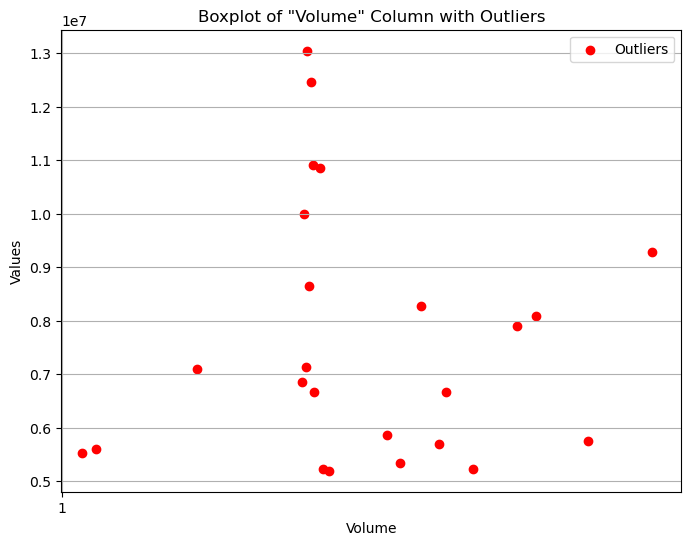

In [14]:
create_boxplot_with_outliers(df , "Volume")

## Missing Values

In [15]:
rows_with_na = df[df.isna().any(axis=1)]

print("Rows with empty or NA cells:")
print(rows_with_na)

Rows with empty or NA cells:
           Date  Open  High  Low  Close  Adj Close  Volume
191  2023-06-01   NaN   NaN  NaN    NaN        NaN     NaN
238  2023-08-07   NaN   NaN  NaN    NaN        NaN     NaN


# Exploratory Data Analysis

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,336.000000,336.000000,336.000000,336.000000,336.000000,3.360000e+02
mean,56.157277,56.776443,55.572455,56.195074,54.256266,3.069293e+06
std,5.078486,5.068250,5.126271,5.082502,5.696004,1.606424e+06
min,41.779999,42.555000,41.525002,42.345001,39.585678,9.658850e+05
25%,53.699999,54.072501,52.799999,53.360000,49.882907,2.193054e+06
50%,56.975001,57.535000,56.475001,56.984999,55.950001,2.732182e+06
75%,59.515000,59.995001,58.925000,59.552499,58.519998,3.354985e+06
max,65.650002,67.019997,65.339996,66.150002,63.090000,1.304715e+07


In [17]:
def visualize_histogram(data, column_name):
    plt.figure(figsize=(6, 4))
    plt.hist(data[column_name])
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of "{column_name}" Column')
    plt.tight_layout()
    plt.show()

    
def visualize_boxplot(data, column_name):
    plt.figure(figsize=(6, 8))
    plt.boxplot(data[column_name])
    plt.title(f'Boxplot of "{column_name}" Column')
    plt.ylabel('Values')
    plt.xlabel(column_name)
    plt.show()
    
    
def visualize_time_series(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_column], data[y_column])
    plt.title(f'{y_column} over {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

def visualize_column_correlation(data, column_name):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    numeric_columns = numeric_columns.drop(column_name)
    correlations = data[numeric_columns].corrwith(data[column_name])
    corr_df = pd.DataFrame({'Correlation': correlations})
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)
    
    cmap = np.random.choice(plt.colormaps())
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[corr_df.index].corr(), annot=True, cmap=cmap, fmt='.2f')
    plt.title(f'Correlation Heatmap of {column_name} with Numeric Columns')
    plt.show()

In [18]:
# Open

In [19]:
df["Open"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 338 entries, 0 to 337
Series name: Open
Non-Null Count  Dtype  
--------------  -----  
336 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


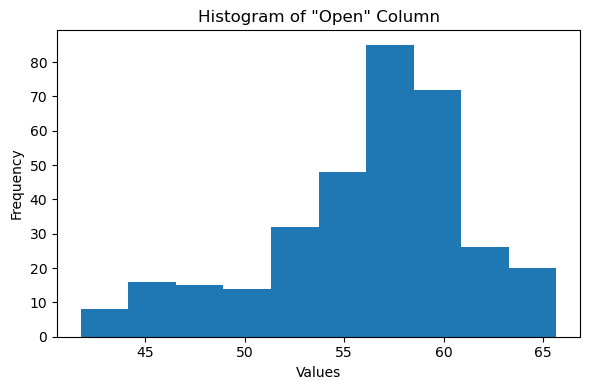

In [20]:
visualize_histogram(df, "Open")

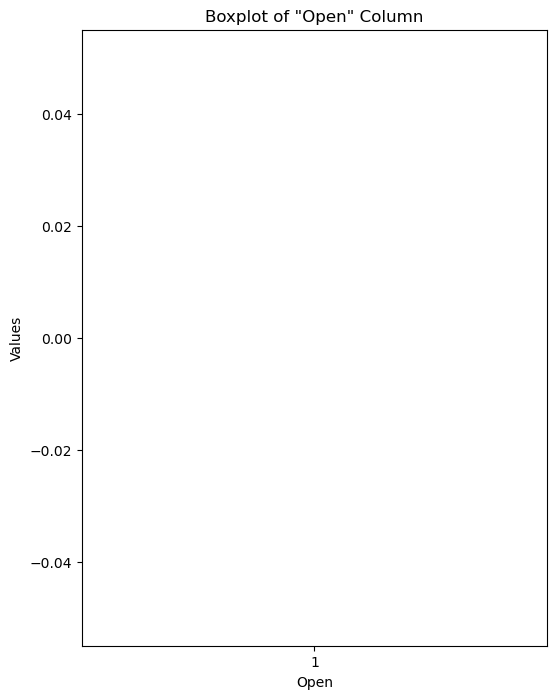

In [21]:
visualize_boxplot(df , "Open")

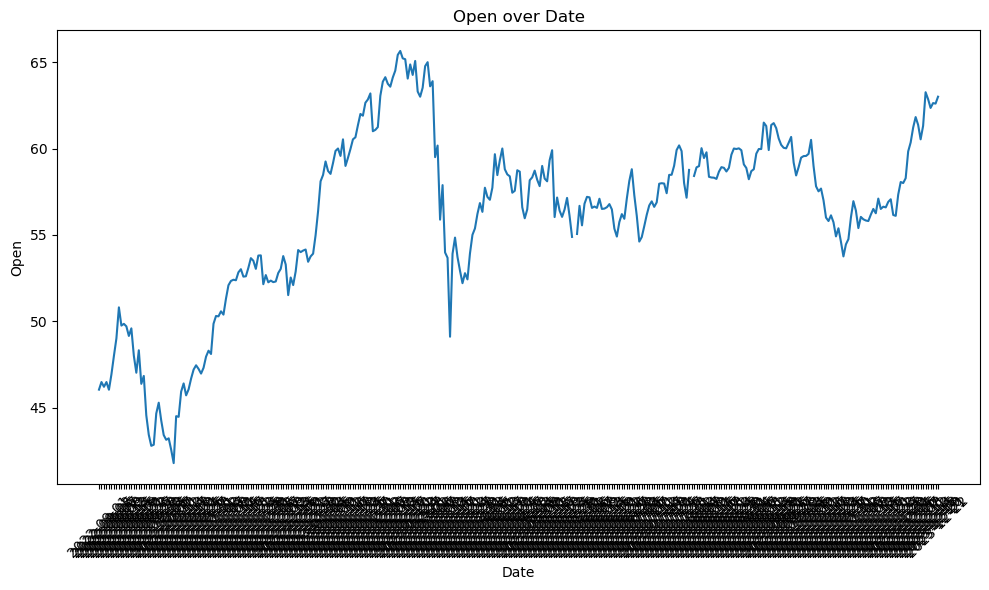

In [22]:
visualize_time_series(df , "Date" , "Open")

In [23]:
oldest_date = df['Date'].min()
newest_date = df['Date'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)

Oldest Date: 2022-09-01
Newest Date: 2023-12-22


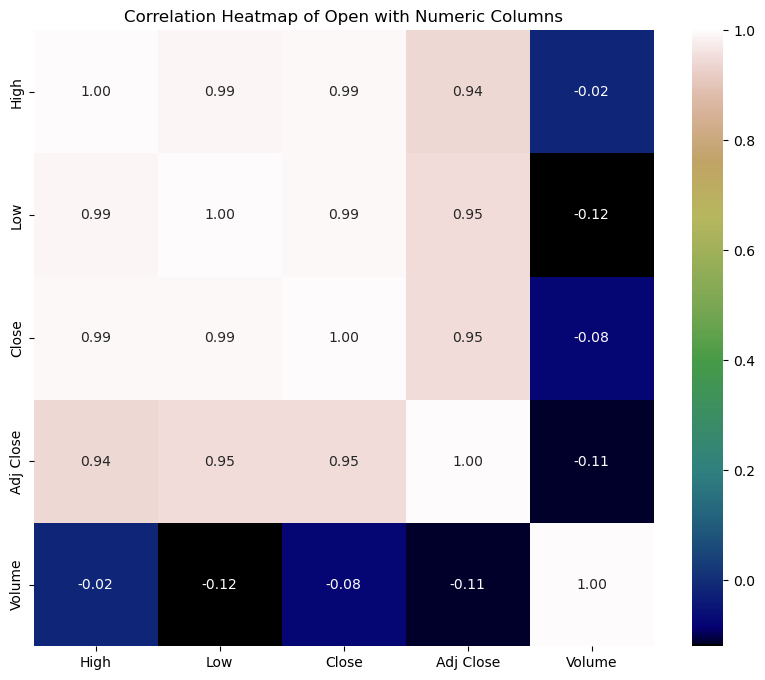

In [24]:
visualize_column_correlation(df , "Open")

In [25]:
# High

In [26]:
df["High"].describe()

count    336.000000
mean      56.776443
std        5.068250
min       42.555000
25%       54.072501
50%       57.535000
75%       59.995001
max       67.019997
Name: High, dtype: float64

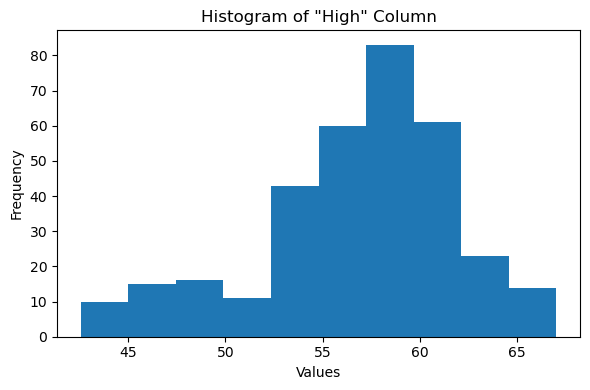

In [27]:
visualize_histogram(df, "High")

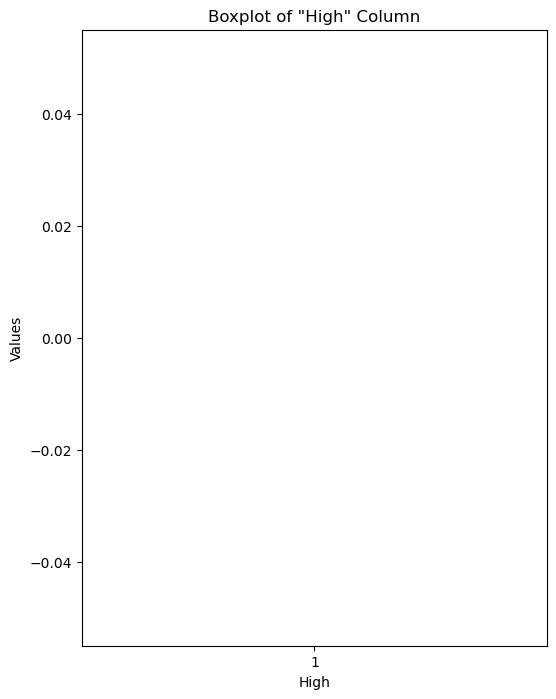

In [28]:
visualize_boxplot(df , "High")

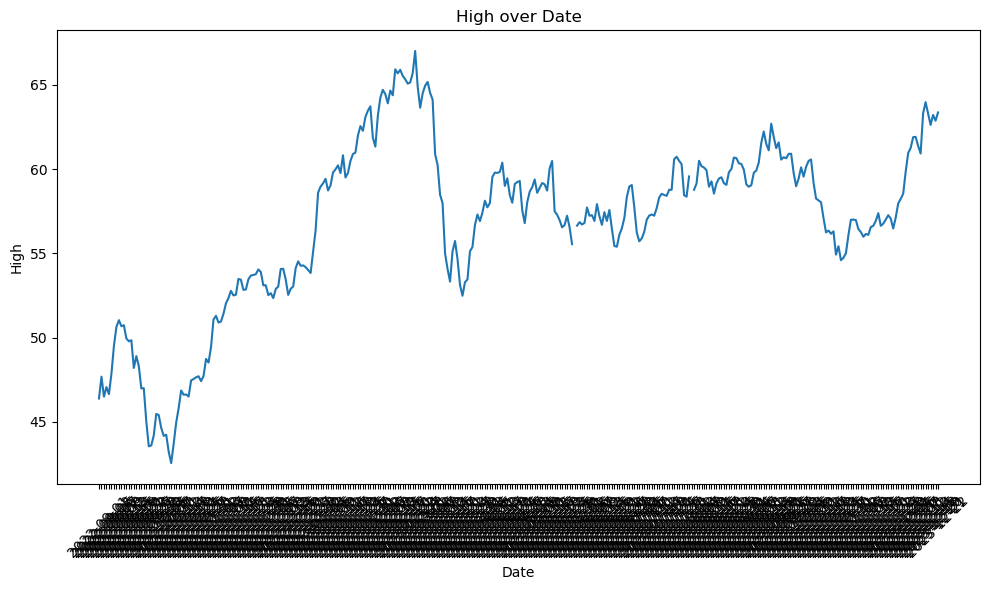

In [29]:
visualize_time_series(df , "Date" , "High")

In [30]:
oldest_date = df['Date'].min()
newest_date = df['Date'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)

Oldest Date: 2022-09-01
Newest Date: 2023-12-22


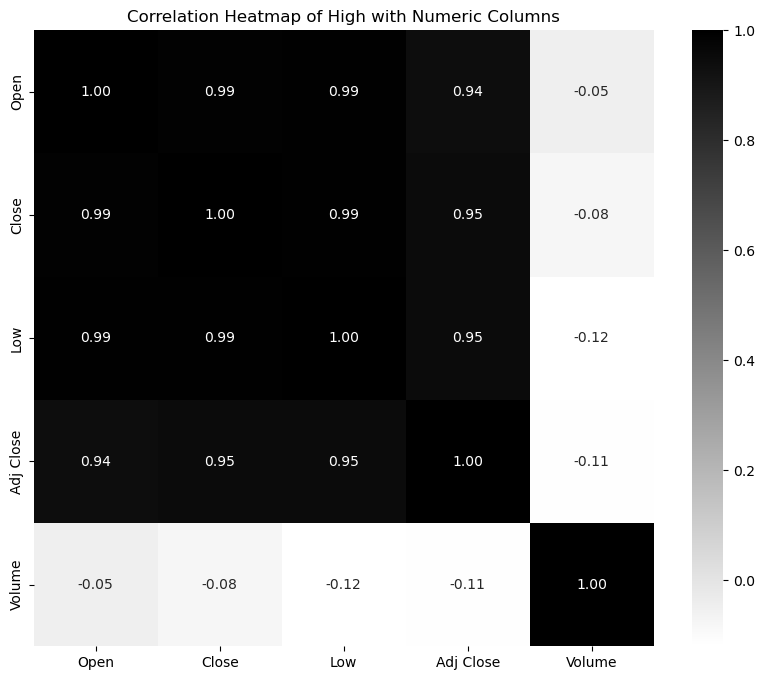

In [31]:
visualize_column_correlation(df , "High")

In [32]:
# Low

In [33]:
df["Low"].describe()

count    336.000000
mean      55.572455
std        5.126271
min       41.525002
25%       52.799999
50%       56.475001
75%       58.925000
max       65.339996
Name: Low, dtype: float64

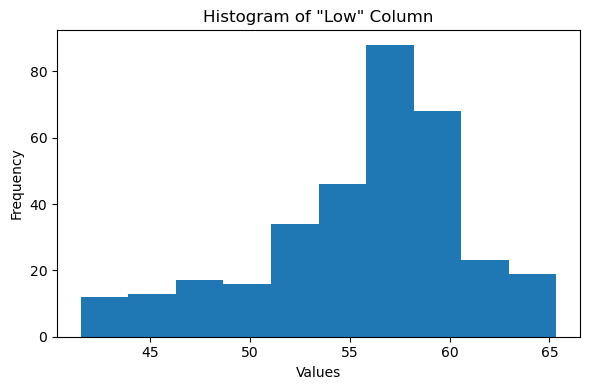

In [34]:
visualize_histogram(df, "Low")

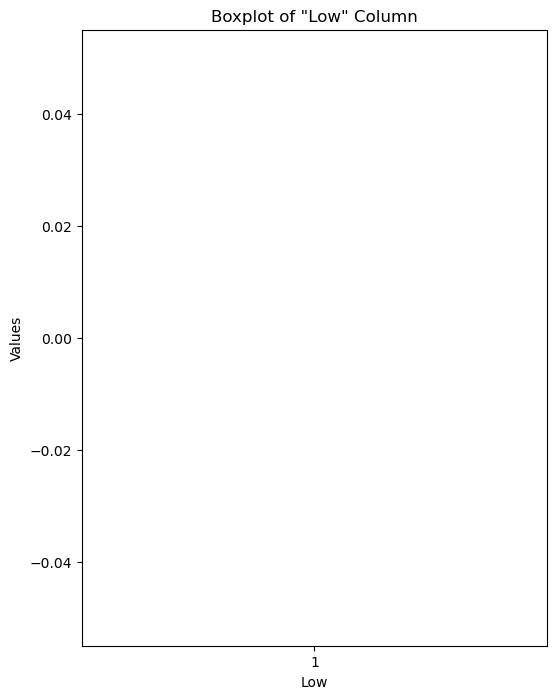

In [35]:
visualize_boxplot(df , "Low")

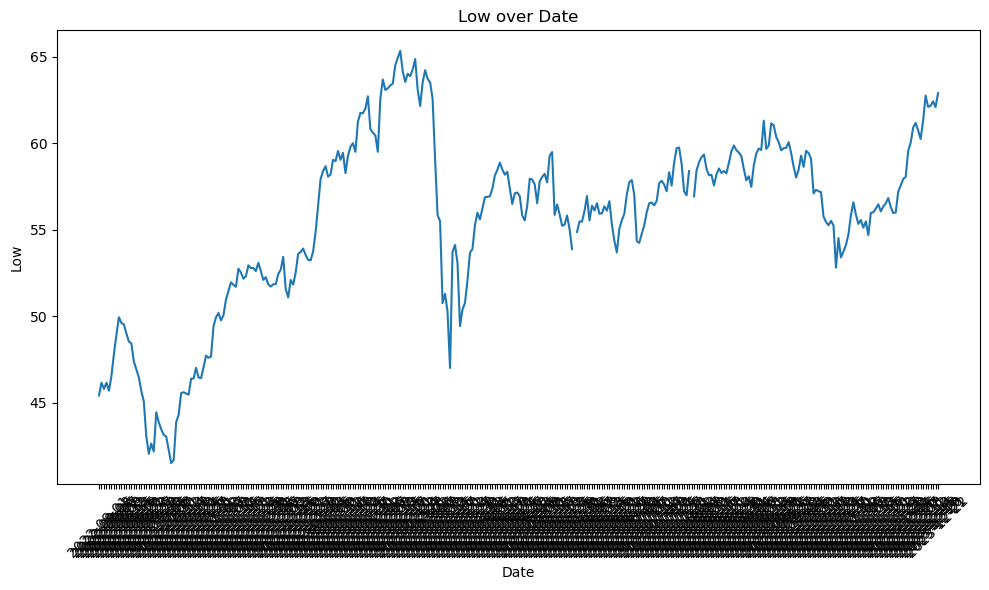

In [36]:
visualize_time_series(df , "Date" , "Low")

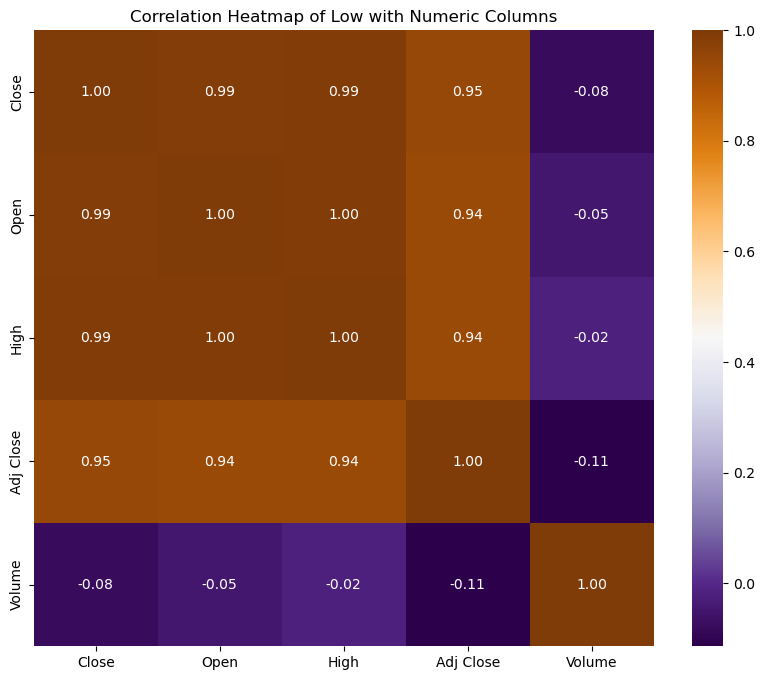

In [37]:
visualize_column_correlation(df , "Low")

In [38]:
# Close

In [39]:
df["Close"].describe()

count    336.000000
mean      56.195074
std        5.082502
min       42.345001
25%       53.360000
50%       56.984999
75%       59.552499
max       66.150002
Name: Close, dtype: float64

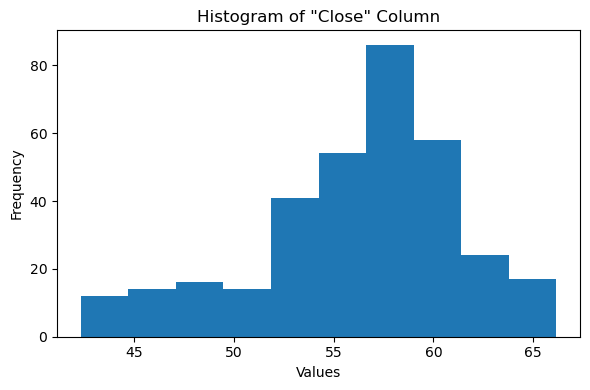

In [40]:
visualize_histogram(df, "Close")

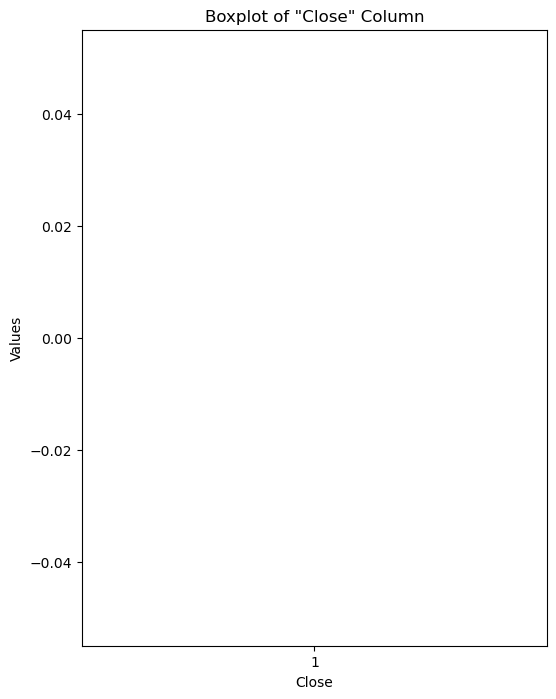

In [41]:
visualize_boxplot(df , "Close")

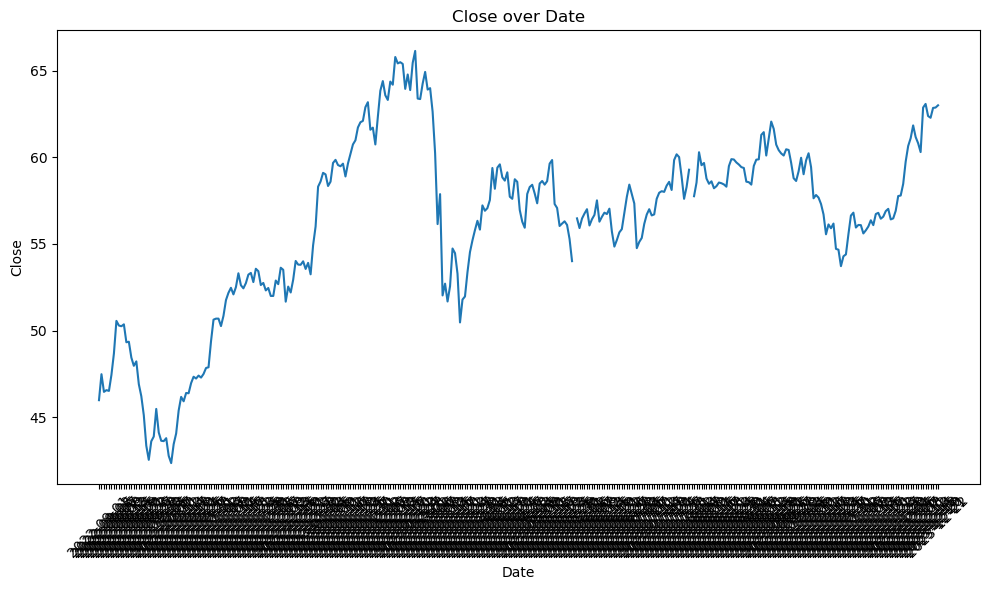

In [42]:
visualize_time_series(df , "Date" , "Close")

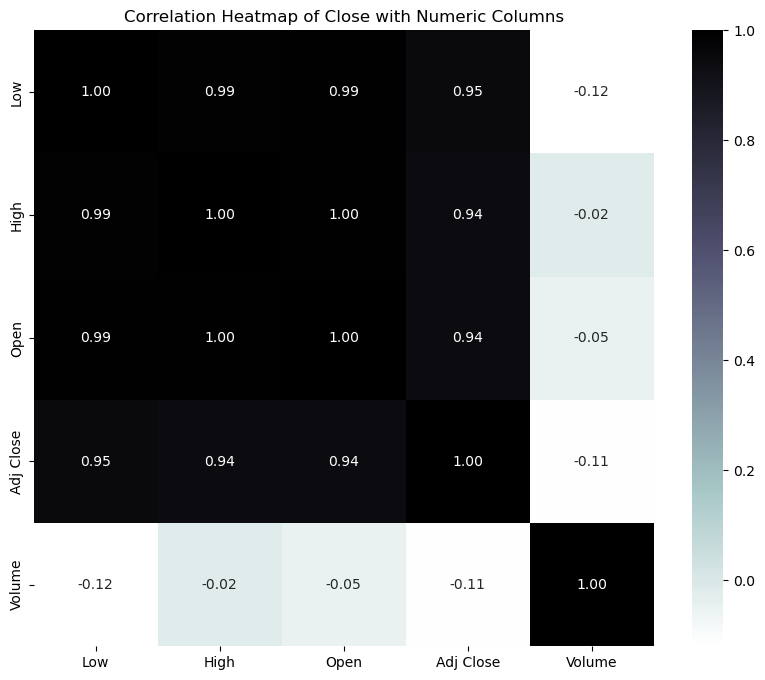

In [43]:
visualize_column_correlation(df , "Close")

In [44]:
# Adj Close

In [45]:
df["Adj Close"].describe()

count    336.000000
mean      54.256266
std        5.696004
min       39.585678
25%       49.882907
50%       55.950001
75%       58.519998
max       63.090000
Name: Adj Close, dtype: float64

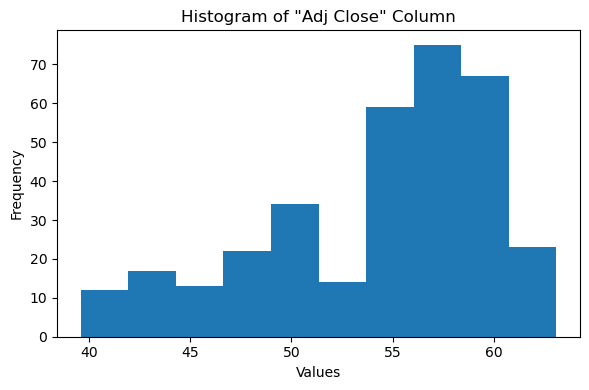

In [46]:
visualize_histogram(df, "Adj Close")

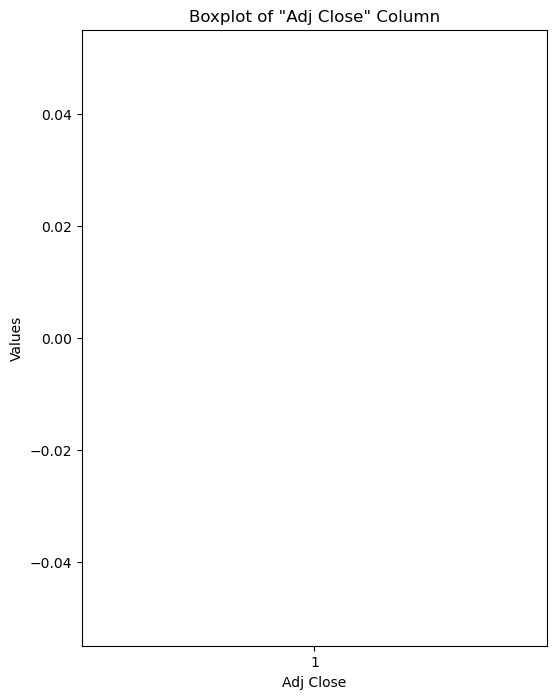

In [47]:
visualize_boxplot(df , "Adj Close")

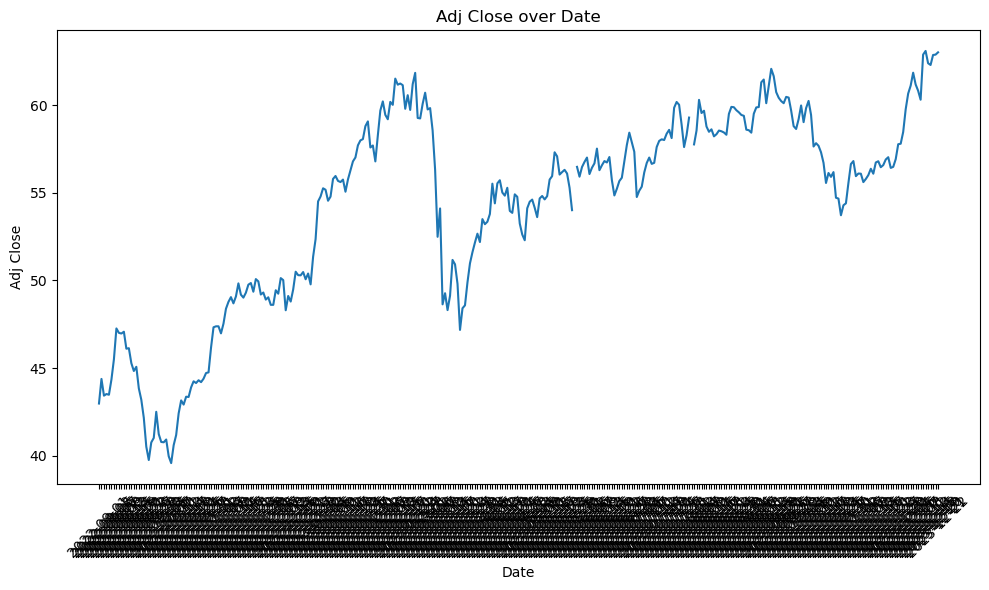

In [48]:
visualize_time_series(df , "Date" , "Adj Close")

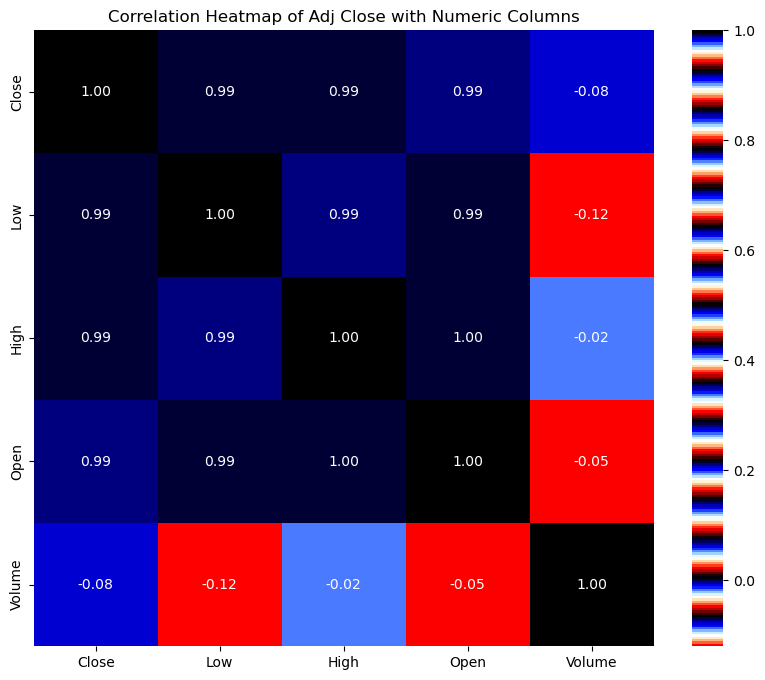

In [49]:
visualize_column_correlation(df , "Adj Close")

In [50]:
# Volume

In [51]:
df["Volume"].describe()

count    3.360000e+02
mean     3.069293e+06
std      1.606424e+06
min      9.658850e+05
25%      2.193054e+06
50%      2.732182e+06
75%      3.354985e+06
max      1.304715e+07
Name: Volume, dtype: float64

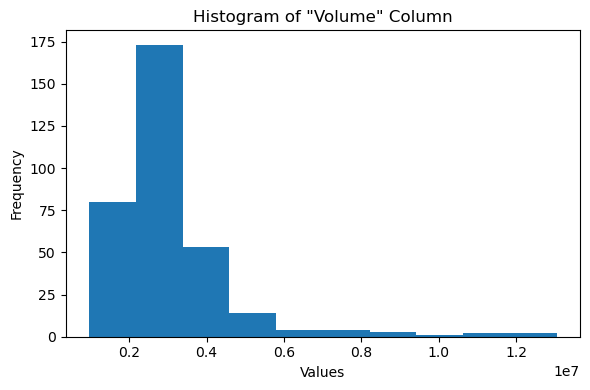

In [52]:
visualize_histogram(df, "Volume")

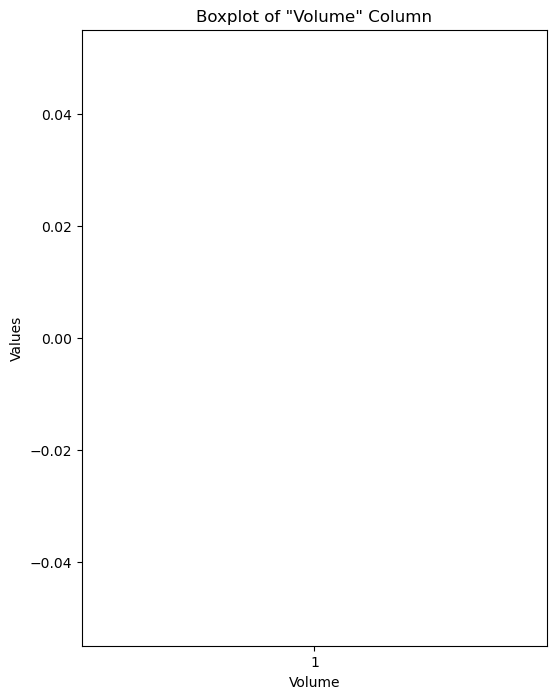

In [53]:
visualize_boxplot(df , "Volume")

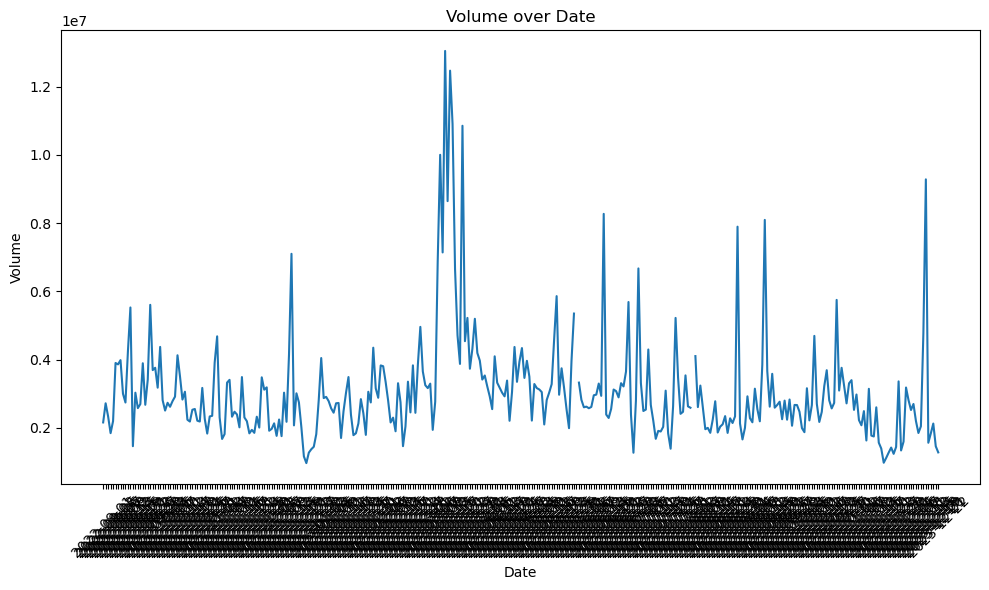

In [54]:
visualize_time_series(df , "Date" , "Volume")

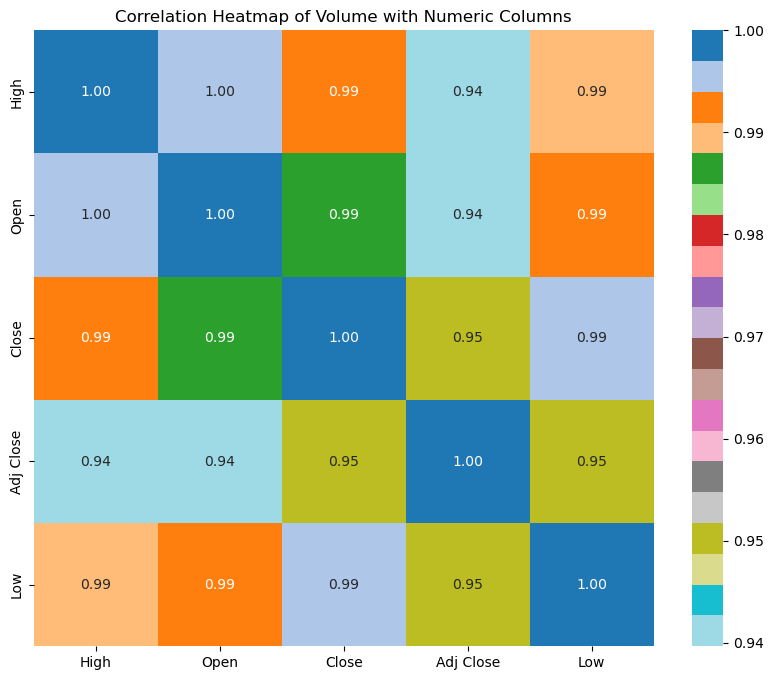

In [55]:
visualize_column_correlation(df , "Volume")

## Varience

In [56]:
def calculate_column_variance(data, column_name):
    column_variance = data[column_name].var()
    return column_variance

def calculate_column_covariance(data, column):
    numeric_columns = data.select_dtypes(include=[np.number]).columns.drop(column)
    covariances = {col: data[[column, col]].cov().iloc[0, 1] for col in numeric_columns}
    print(f"Covariance of '{column}' with other columns:")
    for col, cov in covariances.items():
        print(f"{col}: {cov:.4f}")

In [57]:
# Open

In [58]:
calculate_column_variance(df , "Open")

25.791025093171417

In [59]:
calculate_column_covariance(df , "Open")

Covariance of 'Open' with other columns:
High: 25.6155
Low: 25.8133
Close: 25.4833
Adj Close: 27.1817
Volume: -388418.5014


In [60]:
# High

In [61]:
calculate_column_variance(df , "High")

25.687162873846873

In [62]:
calculate_column_covariance(df , "High")

Covariance of 'High' with other columns:
Open: 25.6155
Low: 25.7415
Close: 25.5991
Adj Close: 27.1890
Volume: -159315.5575


In [63]:
# Low

In [64]:
calculate_column_variance(df , "Low")

26.27865063984347

In [65]:
calculate_column_covariance(df , "Low")

Covariance of 'Low' with other columns:
Open: 25.8133
High: 25.7415
Close: 25.9142
Adj Close: 27.7521
Volume: -989985.0880


In [66]:
# Close

In [67]:
calculate_column_variance(df , "Close")

25.83183109242978

In [68]:
calculate_column_covariance(df , "Close")

Covariance of 'Close' with other columns:
Open: 25.4833
High: 25.5991
Low: 25.9142
Adj Close: 27.5178
Volume: -651247.5435


In [69]:
# Adj Close

In [70]:
calculate_column_variance(df , "Adj Close")

32.44446056010693

In [71]:
calculate_column_covariance(df , "Adj Close")

Covariance of 'Adj Close' with other columns:
Open: 27.1817
High: 27.1890
Low: 27.7521
Close: 27.5178
Volume: -1046123.9301


In [72]:
# Volume

In [73]:
calculate_column_variance(df , "Volume")

2580598443373.3247

In [74]:
calculate_column_covariance(df , "Volume")

Covariance of 'Volume' with other columns:
Open: -388418.5014
High: -159315.5575
Low: -989985.0880
Close: -651247.5435
Adj Close: -1046123.9301


# Beta 

In [75]:
def calculate_beta(data):
    stock_returns = data['Close']
    market_returns = data['Open']
    beta = np.cov(market_returns, stock_returns, ddof=0)[0][1] / np.var(market_returns, ddof=0)
    return beta

In [76]:
calculate_beta(df)

nan

# Cac40 Index Hedge

In [77]:
def calculate_cac40_hedge(data):
    cac40_index = data[['Open']].mean(axis=1)
    beta = np.cov(cac40_index, data['Open'], ddof=0)[0][1] / np.var(cac40_index, ddof=0)
    return beta

In [78]:
calculate_cac40_hedge(df)

nan

# Value at Risk

## Portfolio VaR

In [79]:
def calculate_equal_weighted_portfolio_var(df, confidence_level=0.95):
    stock_returns = df['Close'].pct_change().dropna()  # Calculate daily returns
    num_assets = 1  # As 'stock_returns' is a Series, set the number of assets to 1
    
    weights = np.array([1 / num_assets])
    portfolio_variance = np.dot(weights.T, np.dot(stock_returns.var(), weights))

    portfolio_volatility = np.sqrt(portfolio_variance)
    alpha = 1 - confidence_level
    portfolio_var = norm.ppf(alpha) * portfolio_volatility * np.sqrt(1)
    
    return portfolio_var


def calculate_single_stock_var(df, confidence_level=0.95):
    stock_returns = df['Close'].pct_change().dropna()  # Calculate daily returns
    
    var_values = {}
    stock_variance = np.var(stock_returns)
    stock_volatility = np.sqrt(stock_variance)
    
    alpha = 1 - confidence_level
    stock_var = norm.ppf(alpha) * stock_volatility * np.sqrt(1)
        
    var_values['Close'] = stock_var  # Assign the VaR value to the 'Close' key
    
    return var_values

In [80]:
calculate_equal_weighted_portfolio_var(df)

-0.02737095195473259

## Single Stocks VaR

In [81]:
calculate_single_stock_var(df)

{'Close': -0.02733031206304546}

# HeatMap

In [82]:
def create_heatmap(data):
    numeric_data = data.select_dtypes(include=np.number)
#     plt.figure(figsize=(10000, 10000))
    sns.heatmap(numeric_data, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Heatmap of Numeric DataFrame Columns')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

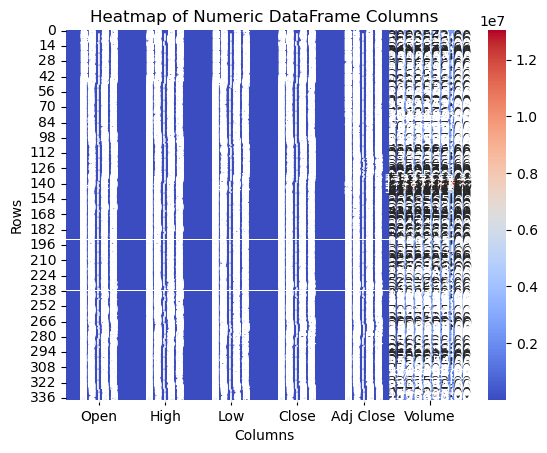

In [83]:
create_heatmap(df)